# Airlines Clustering 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture




In [2]:
df = pd.read_csv("airline-safety.csv")

In [3]:
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


- airline:	Airline (asterisk indicates that regional subsidiaries are included)
- avail_seat_km_per_week:	Available seat kilometers flown every week
- incidents_85_99	Total: number of incidents, 1985–1999
- fatal_accidents_85_99:	Total number of fatal accidents, 1985–1999
- fatalities_85_99:	Total number of fatalities, 1985–1999
- incidents_00_14:	Total number of incidents, 2000–2014
- fatal_accidents_00_14:	Total number of fatal accidents, 2000–2014
- fatalities_00_14:	Total number of fatalities, 2000–2014

In [4]:
df.isnull().values.any()

False

In [5]:
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [6]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
airline                   56 non-null object
avail_seat_km_per_week    56 non-null int64
incidents_85_99           56 non-null int64
fatal_accidents_85_99     56 non-null int64
fatalities_85_99          56 non-null int64
incidents_00_14           56 non-null int64
fatal_accidents_00_14     56 non-null int64
fatalities_00_14          56 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


## Data Analaysis

In [8]:
df["avail_seat_km_per_week"]=df["avail_seat_km_per_week"]/max(df["avail_seat_km_per_week"])

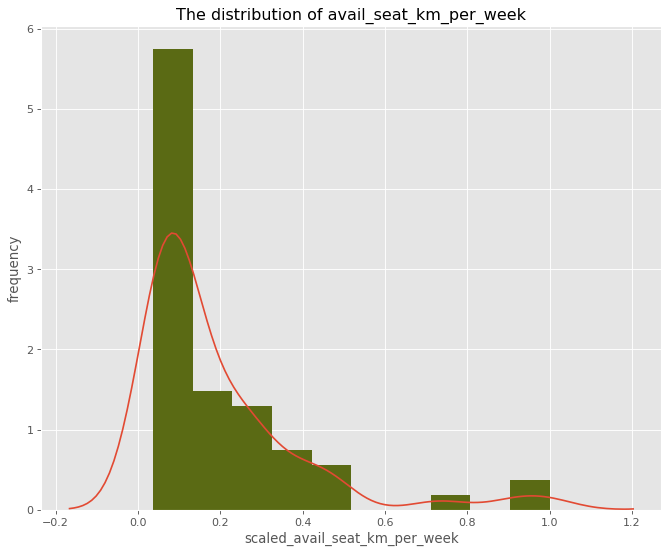

In [9]:
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist(df["avail_seat_km_per_week"],color="g",bins=10,density=True)
sns.distplot(df["avail_seat_km_per_week"])
plt.title("The distribution of avail_seat_km_per_week")
plt.xlabel("scaled_avail_seat_km_per_week")
plt.ylabel("frequency")
plt.show()

- The distribution is skewed with few airlines having long seat distances per week as seen bellow that means there exists few airlines that cover long distance flights.

##### To see whether safety has improved after 2000, the distribution of incidences after 2000 is expected to be lower than incidences before 2000.

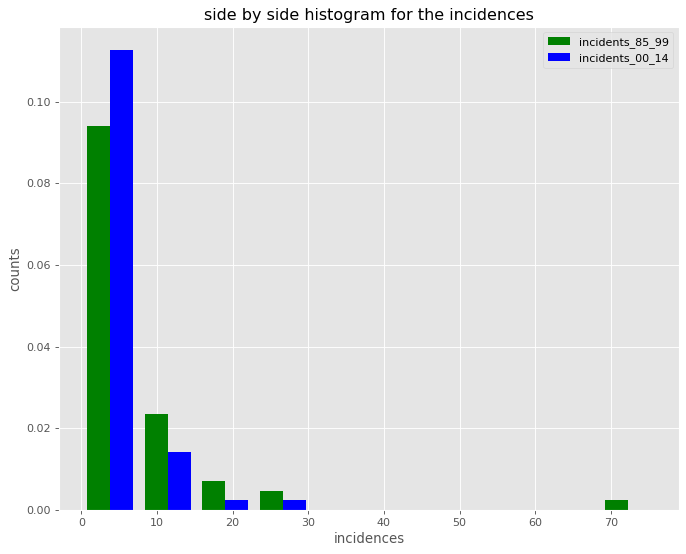

In [10]:
x1=list(df["incidents_85_99"])
x2=list(df["incidents_00_14"])
colors=["green","blue"]
names = ["incidents_85_99","incidents_00_14"]
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist([x1,x2],color = colors, label=names,density=True)
plt.legend()
plt.xlabel("incidences")
plt.ylabel("counts")
plt.title("side by side histogram for the incidences")
plt.show()

- From the histograms above, we see that there are some airlines that had 70 incidences before 2000 but that large number of incidences is never happened for any airline after 2000.

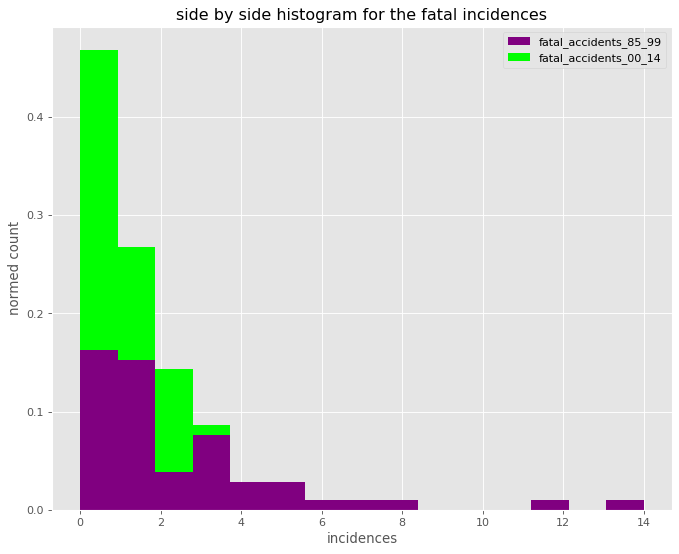

In [11]:
x1=list(df["fatal_accidents_85_99"])
x2=list(df["fatal_accidents_00_14"])
colors=["purple","lime"]
names = ["fatal_accidents_85_99","fatal_accidents_00_14"]
plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.hist([x1,x2],color = colors, label=names,density=True,stacked=True,bins=15)
plt.legend()
plt.xlabel("incidences")
plt.ylabel("normed count")
plt.title("side by side histogram for the fatal incidences")
plt.show()

- We can see that fatal incidences after the year 2000 did not pass 4 for each airline while before the year 2000 there were fatal incidences that could go to 14 counts for a particular airline.By looking at the incidences and fatal incidences provides us some bit of light about the improvements in the safety.

In [12]:
def heatmap(x,y,size):
    fig,ax=plt.subplots()
    # Mapping from column names to integer coordinates
    x_labels=[v for v in sorted(x.unique())]
    y_labels=[v for v in sorted(y.unique())]
    x_to_num={p[1]:p[0] for p in enumerate(x_labels)}
    y_to_num={p[1]:p[0] for p in enumerate(y_labels)}
    
    size_scale = 250
    
    ax.scatter(
        x=x.map(x_to_num), #using mapping for x
        y=y.map(y_to_num),
        s=size*size_scale,
        c='red',
        marker='s'
    )
    
    #showing column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels,rotation=45,horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(x_labels)
    
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_title("correlation plt for fatality metrics")
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

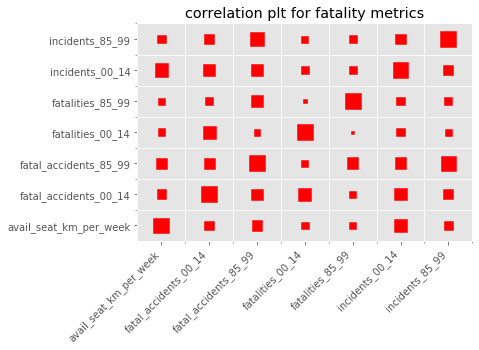

In [13]:
corr=df.corr()
corr=pd.melt(corr.reset_index(),id_vars='index')
columns=['x','y','value']#list(data.columns)[1:]
heatmap(
    x=corr['index'],
    y=corr['variable'],
    size=corr['value'].abs()
)
plt.show()

- By looking at the correlation of the features, we see that incidences are correlated to fatal incidences which are then correlated to fatalities. 

# Clustering using GMM

In [14]:
data=df.drop(["airline","avail_seat_km_per_week"],axis=1)
data.head()

,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,2,0,0,0,0,0
1,76,14,128,6,1,88
2,6,0,0,1,0,0
3,3,1,64,5,0,0
4,2,0,0,2,0,0


In [15]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

#predictions from gmm
gmm_labels = gmm.predict(data)


In [16]:
df['clusters'] = gmm_labels
df.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
0,Aer Lingus,0.044949,2,0,0,0,0,0,1
1,Aeroflot*,0.167758,76,14,128,6,1,88,0
2,Aerolineas Argentinas,0.054039,6,0,0,1,0,0,1
3,Aeromexico*,0.083604,3,1,64,5,0,0,1
4,Air Canada,0.261266,2,0,0,2,0,0,1
5,Air France,0.420770,14,4,79,6,2,337,1
6,Air India*,0.121756,2,1,329,4,1,158,2
7,Air New Zealand*,0.099474,3,0,0,5,1,7,1
8,Alaska Airlines*,0.135216,5,0,0,5,1,88,1
9,Alitalia,0.097771,7,2,50,4,0,0,1


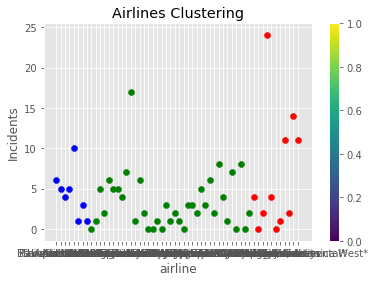

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
color=['blue','green','red']
for k in range(0,3):
    data = df[df["clusters"]==k]
    scatter=ax.scatter(data["airline"],data["incidents_00_14"],c=color[k])
#plt.show()
ax.set_title('Airlines Clustering')

ax.set_xlabel('airline')
ax.set_ylabel('Incidents')
plt.colorbar(scatter)

### **Here, We can grouped the airlines into 3 groups:**

- <h4 style='color:blue;'>The Safest airlines.</h4>
- <h4 style='color:green'>Doubtfully safe airlines.</h4>
- <h4 style='color:red;'>Risky airlines.</h4>

In [25]:
df[df["clusters"]==0].head(8)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
1,Aeroflot*,0.167758,76,14,128,6,1,88,0
22,Ethiopian Airlines,0.068433,25,5,167,5,2,92,0
24,Garuda Indonesia,0.085913,10,3,260,4,2,22,0
27,Iberia,0.164330,4,1,148,5,0,0,0
35,Pakistan International,0.048823,8,3,234,10,2,46,0
42,South African,0.091256,2,1,159,1,0,0,0
45,SWISS*,0.111020,2,1,229,3,0,0,0
53,Vietnam Airlines,0.087556,7,3,171,1,0,0,0


In [26]:
df[df["clusters"]==1].head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
0,Aer Lingus,0.044949,2,0,0,0,0,0,1
2,Aerolineas Argentinas,0.054039,6,0,0,1,0,0,1
3,Aeromexico*,0.083604,3,1,64,5,0,0,1
4,Air Canada,0.261266,2,0,0,2,0,0,1
5,Air France,0.420770,14,4,79,6,2,337,1
7,Air New Zealand*,0.099474,3,0,0,5,1,7,1
8,Alaska Airlines*,0.135216,5,0,0,5,1,88,1
9,Alitalia,0.097771,7,2,50,4,0,0,1
10,All Nippon Airways,0.257902,3,1,1,7,0,0,1
11,American*,0.732336,21,5,101,17,3,416,1


In [28]:
df[df["clusters"]==2].head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
6,Air India*,0.121756,2,1,329,4,1,158,2
13,Avianca,0.055597,5,3,323,0,0,0,2
16,China Airlines,0.113907,12,6,535,2,1,225,2
19,Delta / Northwest*,0.914049,24,12,407,24,2,51,2
20,Egyptair,0.078117,8,3,282,4,1,14,2
28,Japan Airlines,0.220501,3,1,520,0,0,0,2
31,Korean Air,0.242954,12,5,425,1,0,0,2
40,Saudi Arabian,0.120414,7,2,313,11,0,0,2
49,Thai Airways,0.238511,8,4,308,2,1,1,2
51,United / Continental*,1.000000,19,8,319,14,2,109,2


# Clustering using SOM

In [70]:
df = pd.read_csv("airline-safety.csv")


In [71]:
x_train=df.drop(["airline","avail_seat_km_per_week"],axis=1)

In [72]:
import SimpSOM as sps

- Building a network (20x20) with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 


In [73]:
net = sps.somNet(20, 20, x_train.values, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


- Train the network for 20000 epochs and with initial learning rate of 0.01.


In [74]:
net.train(0.01, 20000)

Training SOM... done!        


- Then save the weights to file and print a map of the network nodes and color them according to the first feature (column number 0) of the data-set and then according to the distance between each node and its neighbors.


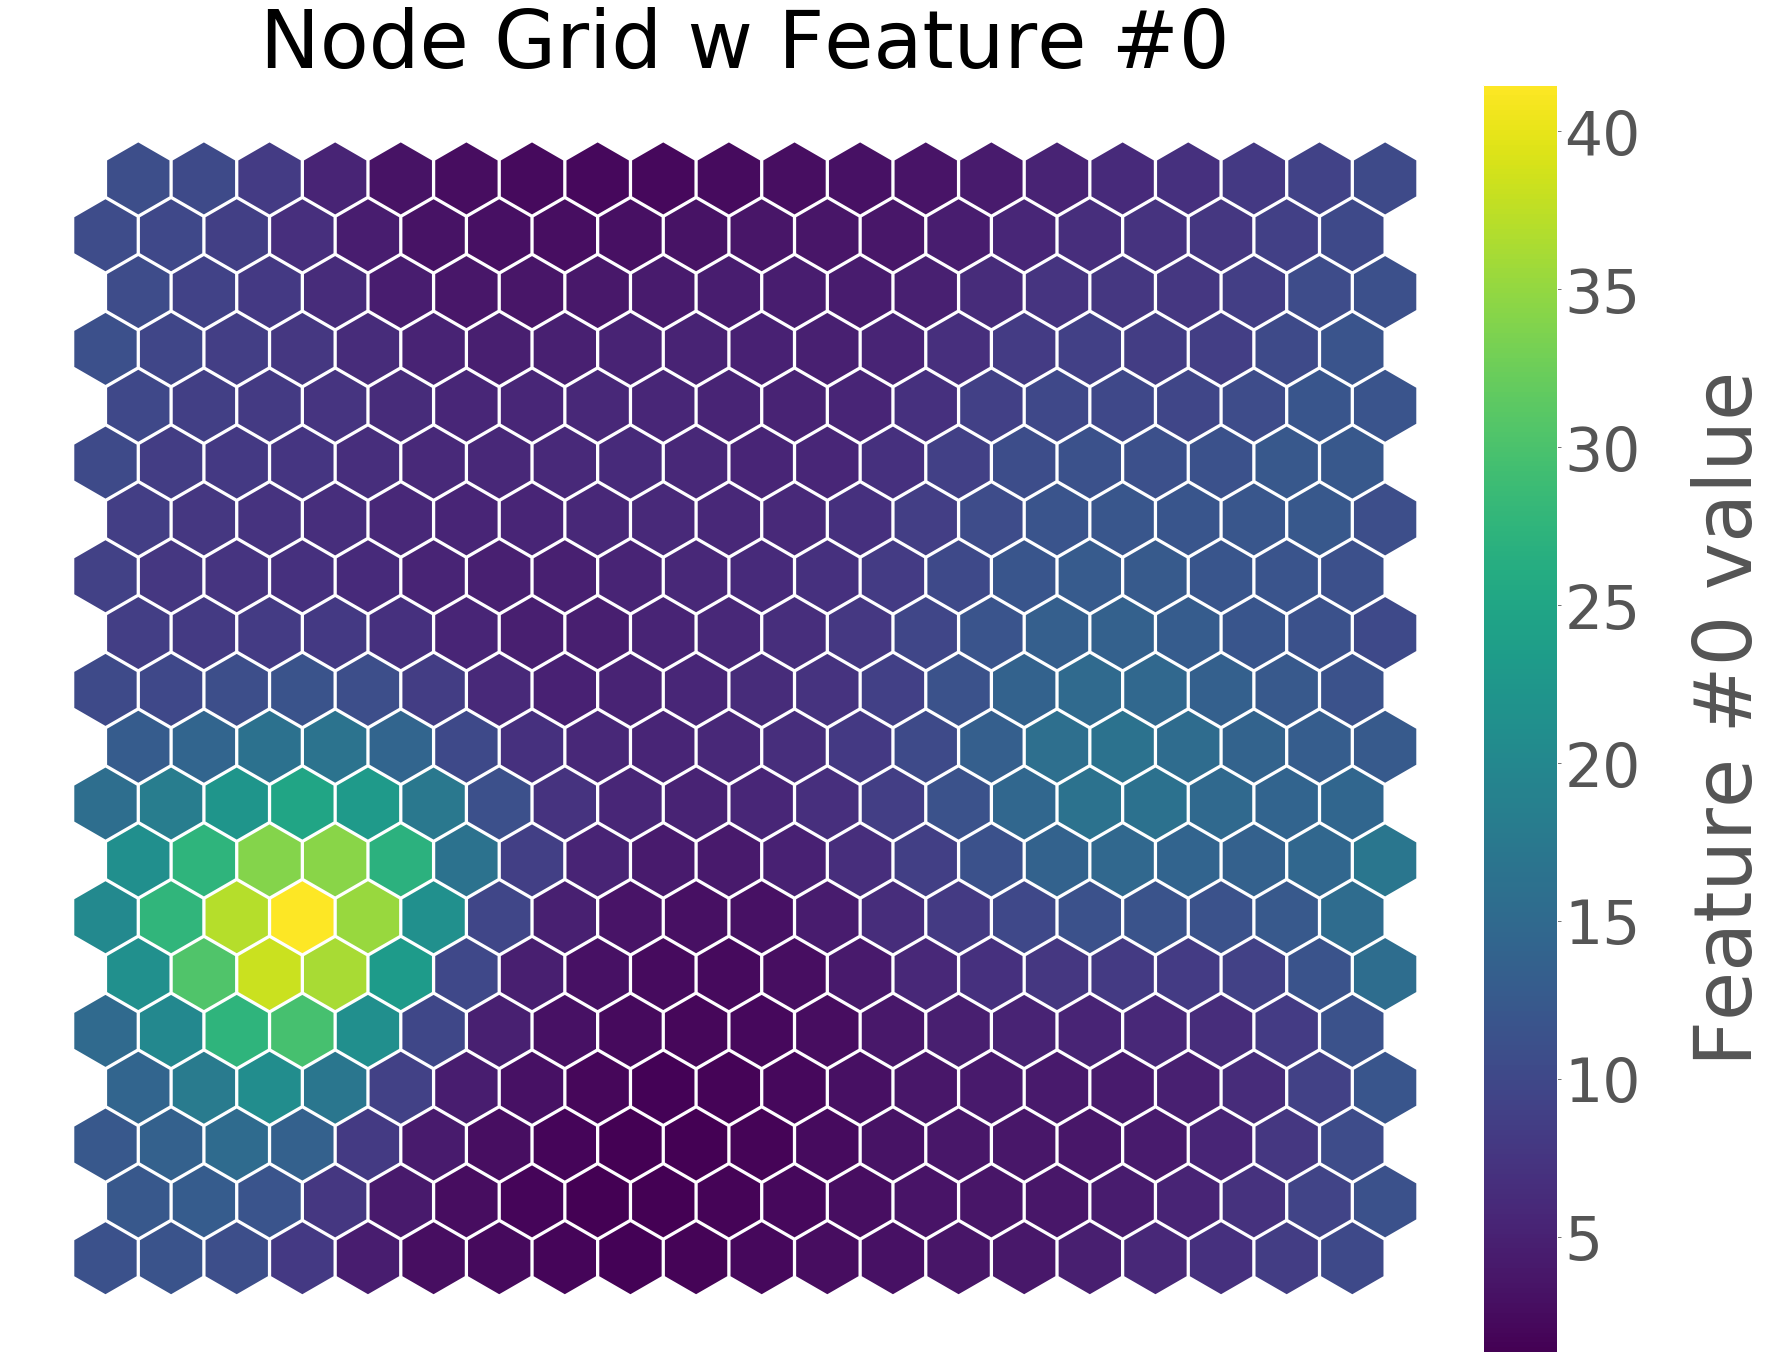

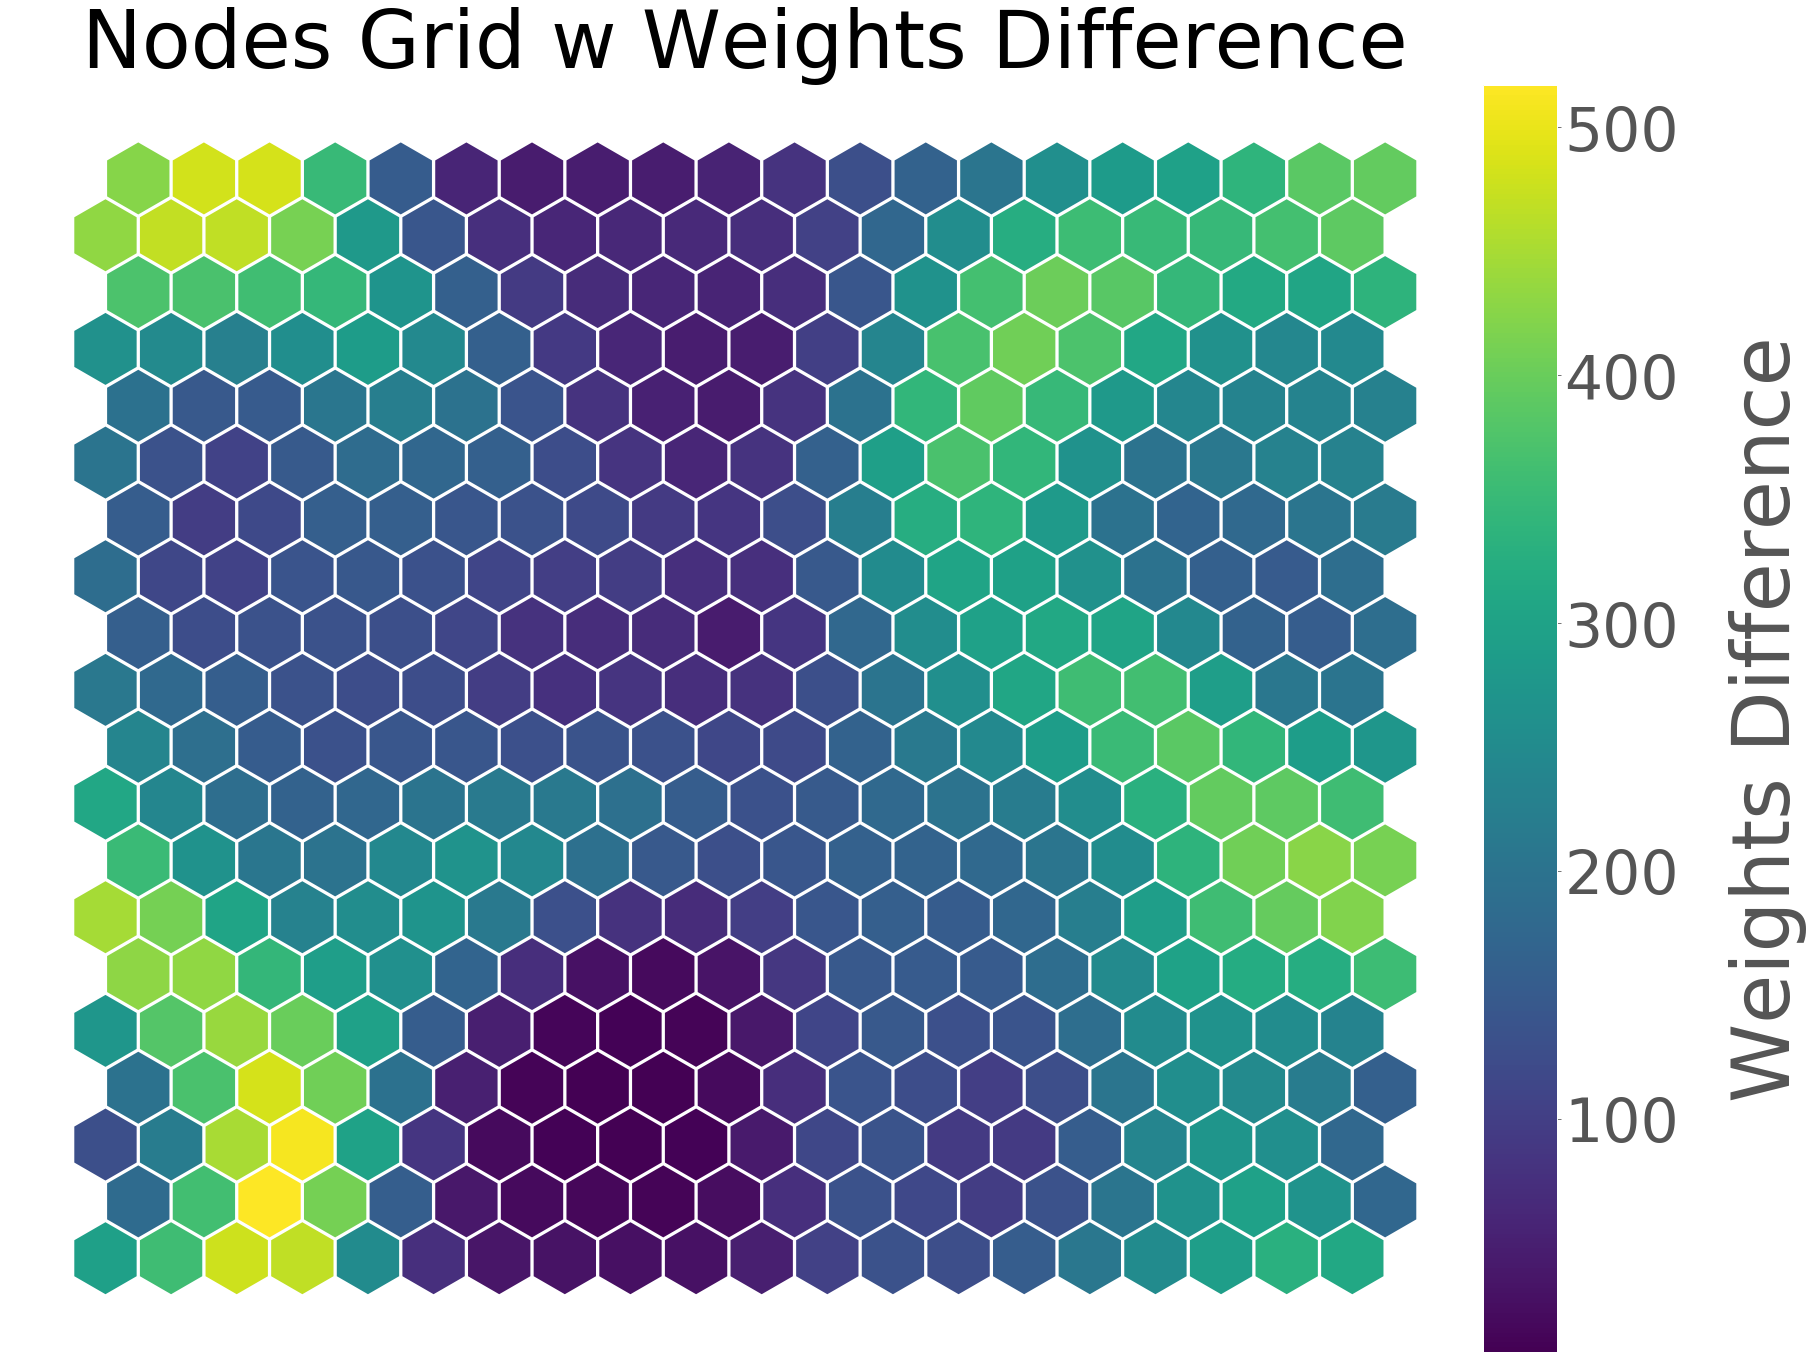

In [87]:
net.nodes_graph(colnum=0)
net.diff_graph()

- Then we project the data points on the new 2D network map

In [76]:
prj=np.array(net.project(x_train.values))

<Figure size 432x288 with 0 Axes>

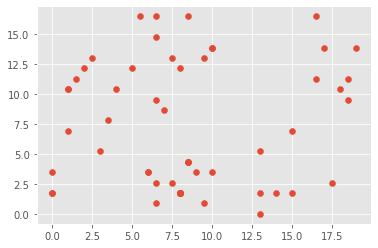

In [77]:
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [ ]:
#net.cluster(x_train.values, type='qthresh')

In [78]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
df["clusters"]=kmeans.labels_

In [79]:
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
0,Aer Lingus,0.044949,2,0,0,0,0,0,1
1,Aeroflot*,0.167758,76,14,128,6,1,88,1
2,Aerolineas Argentinas,0.054039,6,0,0,1,0,0,1
3,Aeromexico*,0.083604,3,1,64,5,0,0,0
4,Air Canada,0.261266,2,0,0,2,0,0,1


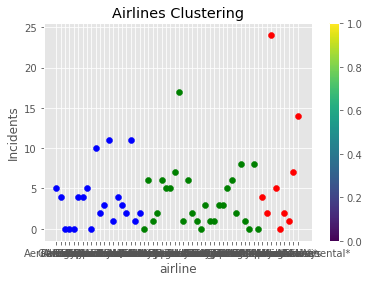

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
color=['blue','green','red']
for k in range(0,3):
    data = df[df["clusters"]==k]
    scatter=ax.scatter(data["airline"],data["incidents_00_14"],c=color[k])
#plt.show()
ax.set_title('Airlines Clustering')

ax.set_xlabel('airline')
ax.set_ylabel('Incidents')
plt.colorbar(scatter)

### **Here, We can grouped the airlines into 3 groups:**

- <h4 style='color:blue;'>The Safest airlines.</h4>
- <h4 style='color:green'>Doubtfully safe airlines.</h4>
- <h4 style='color:red;'>Risky airlines.</h4>

In [82]:
df[df["clusters"]==0].head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
3,Aeromexico*,0.083604,3,1,64,5,0,0,0
9,Alitalia,0.097771,7,2,50,4,0,0,0
13,Avianca,0.055597,5,3,323,0,0,0,0
17,Condor,0.058547,2,1,16,0,0,0,0
18,COPA,0.077107,3,1,47,0,0,0,0


In [83]:
df[df["clusters"]==1].head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
0,Aer Lingus,0.044949,2,0,0,0,0,0,1
1,Aeroflot*,0.167758,76,14,128,6,1,88,1
2,Aerolineas Argentinas,0.054039,6,0,0,1,0,0,1
4,Air Canada,0.261266,2,0,0,2,0,0,1
5,Air France,0.420770,14,4,79,6,2,337,1


In [84]:
df[df["clusters"]==2].head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,clusters
6,Air India*,0.121756,2,1,329,4,1,158,2
16,China Airlines,0.113907,12,6,535,2,1,225,2
19,Delta / Northwest*,0.914049,24,12,407,24,2,51,2
22,Ethiopian Airlines,0.068433,25,5,167,5,2,92,2
28,Japan Airlines,0.220501,3,1,520,0,0,0,2
